In [1]:
# Make sure helpers functionality can be imported
import os
import sys

project_path, _ = os.path.split(os.getcwd())
if project_path not in sys.path:
    sys.path.insert(0, project_path)

In [2]:
# Dependencies
# pip install numpy
# pip install pandas
# pip install matplotlib

# Ignore warnings
import warnings; warnings.simplefilter("ignore")

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load an experimental data

In [3]:
# Load an example dataset
from sklearn.datasets import load_wine

dataset = load_wine()
X = dataset.data
y = dataset.target
feature_names = dataset.feature_names

print(dataset.get('DESCR'))

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## Plot the box-violin graph

### 1. Plot single graph

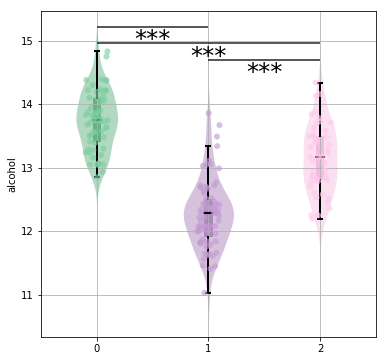

In [4]:
from helpers.exploration.visualization import plot_box_violin

# Create temporary DataFrame
df = pd.DataFrame({feature_names[i]: X[:, i] for i in range(len(feature_names))})

# Add the target variable into the DataFrame
df["class"] = y

# Get example feature
x_temp = "class"
y_temp = feature_names[0]

# Plot the box-violin graph
plot_box_violin(x_temp,
                y_temp,
                df,
                fig_size=(6, 6),
                fig_show=True,
                save_as=None,
                y_label=y_temp)

### 2. Plot multiple graphs

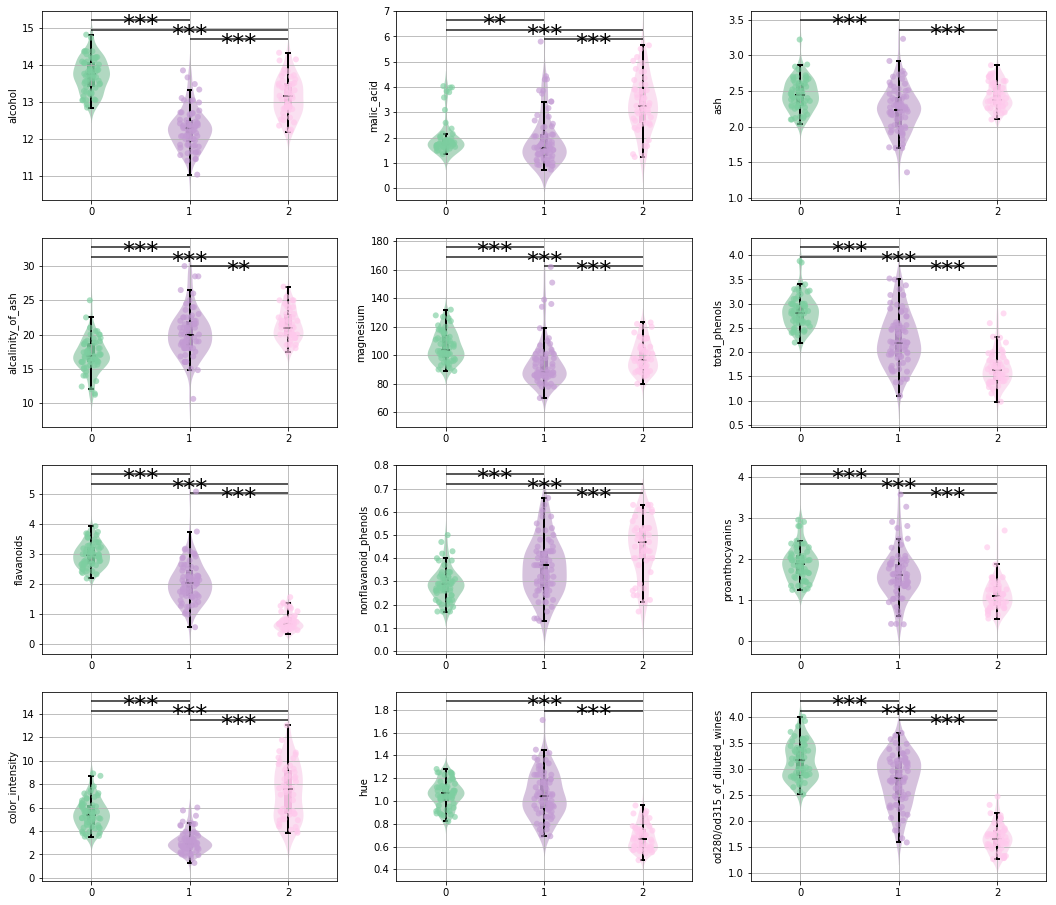

In [5]:
from helpers.exploration.visualization import plot_box_violin

# Create temporary DataFrame
df = pd.DataFrame({feature_names[i]: X[:, i] for i in range(len(feature_names))})

# Add the target variable into the DataFrame
df["class"] = y

# Prepare the figure
fig = plt.figure(figsize=(18, 16))

# Plot the box-violin graph for the first 12 example features
for vol, i in enumerate(range(12), 1):

    # Get example feature
    x_temp = "class"
    y_temp = feature_names[i]
    
    # Add the subplot (create axes)
    ax = fig.add_subplot(4, 3, vol)
    
    # Plot the box-violin graph
    plot_box_violin(x_temp,
                    y_temp,
                    df,
                    ax=ax,
                    fig_size=(6, 6),
                    fig_show=False,
                    save_as=None,
                    y_label=y_temp)

## Plot missing values

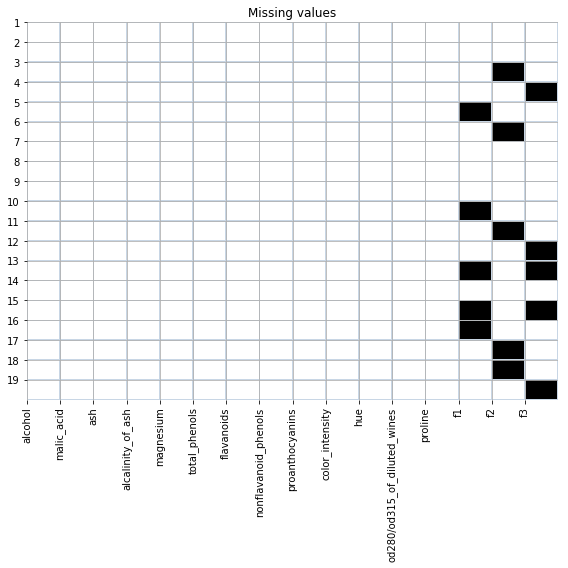

In [6]:
from helpers.exploration.visualization import plot_missing_values

# Create temporary DataFrame
df = pd.DataFrame({feature_names[i]: X[:, i] for i in range(len(feature_names))})
df = df.iloc[1:20, :]

# Define the number of NaNs per feature
num_nans = 5

# Add some features with missing data
n = np.random.randn(df.shape[0], 1)
n.ravel()[np.random.choice(n.size, num_nans, replace=False)] = np.nan
df["f1"] = n

n = np.random.randn(df.shape[0], 1)
n.ravel()[np.random.choice(n.size, num_nans, replace=False)] = np.nan
df["f2"] = n

n = np.random.randn(df.shape[0], 1)
n.ravel()[np.random.choice(n.size, num_nans, replace=False)] = np.nan
df["f3"] = n

# Plot the missing values
plot_missing_values(df, save_as=None)